#### CIE4604 Simulation and Visualization
# Assignment 1 - Random Walk and Colored Noise

In this assignment you will simulate and analyse two random processes (time-series):  a random walk process and a colored noise process.  The colored noise process is very important for simulating measurement errors that are correlated in time. Colored noise is frequently encountered in remote sensing sensors as well as in many physical processes.

**Hans van der Marel** studynumber ????

## Part I - Random Walk

> A random-walk process is generated using the recursive formula
>
> $ x_k = x_{k-1} + w_k \ \ \ \ \ w_k \sim N(0,q_k = q \Delta t)$
>
> with $w_k$ normal distributed Gaussian noise with variance $q_k = q \cdot \Delta t$. The variance $q_k$ is a function of the the power spectral density $q$ and sample interval $\Delta t = t_k - t_{k-1}$. The main attraction of working with the power spectral density is that the behaviour of the random-walk process does not depend on the chosen sample interval. In our simulations we will choose $\Delta t = 1$ to keep it simple.
>
> The initial condition $x_0$ is either $x_0 = 0$ (deterministic), or, a drawn from a normal distribution $x_0 \sim N(0,q_k )$ with variance $q_k$ (stochastic). Both options for the initial condition will result in the similar (though shifted) series.
>
> The *formal* standard deviation $\sigma_{x_k}$ of the random walk variable $x_k$ can be computed recursively using error propagation, with the recusive formula
>
> $\sigma_{x_k}^2 = \sigma_{x_{k-1}}^2  + q_k$
>
> The *empirical* standard deviation of the random walk variable $x_k$ can be computed by simulating multiple realizations of the randow walk and then computing the standard deviation at every epoch. You will have to compute both in the assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn 
from timeit import default_timer  

### Question 1.a

> Generate 100 random walk sequences, each with sample interval $\Delta t = 1$ and 2000 samples long, and plot. 
> The plot should contain:
> - The 100 realizations (time-series) of the random walk process $x_k$ , 
> - The formal standard deviation $\sigma_{x_k}$ as function of time, computed using error propagation using the recursive formula,
> - The empirical mean and standard deviation of the different realizations of $x_k$ as function of time. 
>
> Hint: for visual appearance, plot instead of the formal and empirical standard deviations, the boundaries of the 95\% reliability interval $-2 \sigma_{x_k}$ and $+2 \sigma_{x_k}$, or use a separate plot for the mean and standard deviations.


In [2]:
def randrw(n, m=1, q=1, dt=1, initZero=False):
    """
    You should provide a description what this function does, and explain all the input and output parameters

    Input parameters:
    dt = 1             # time interval
     q = 1              # power spectral density, is an input parameter, we can choose q  (q = qk for dt=1)
    initZero = True    # boolean to initialize with zero
    n = 2000           # choose the length of the series (n)
    m = 100            # number of realizations 

    Output parameters:
    x            Random walk sequence
    sx           Formal standard deviation of the random walk sequence
    
    Examples:
    
    (c) Class of 2021, CC-BY
    """

    tic = default_timer()

    # convert power-spectral density to sqrt(variance) for randn

    qk = q * dt
    sqk = np.sqrt(qk)

    # preallocate memory 

    x = np.zeros([n,m])               # pre-allocate memory (very important), but it also sets the initial condition x[0]=0 !!!!
    qx = np.zeros([n,1])       
    w = sqk * randn(n,m)              # call the random number generator once to make a matrix of random N(0,qk) numbers 

    if not initZero:                      # we do the initialization here !!!
        x[0,:] =  w[0,:]
        qx[0] = qk
    
    for k in np.arange(1,n):
        x[k,:] = x[k-1,:] + w[k,:]
        qx[k] = qx[k-1] + qk

    toc = default_timer()
    # print('Elapsed time in seconds is ', toc-tic)
    
    return x, np.sqrt(qx)
    

def rw_plot(x,sx=None):   

    n, m = x.shape
    
    # Compute emeperical mean and standard deviation
    
    xmean = np.mean(x, axis=1)
    xstd = np.std(x, axis=1)

    # plot it

    plt.figure()
    plt.plot(x[:,1:], linewidth=0.25)
    plt.plot(x[:,0], label='rw', linewidth=2, color='k')
    plt.plot(xmean,   color='b', linewidth=2, label='Mean')
    plt.plot(2*xstd,  color='r', linewidth=2, label='95% interval')
    plt.plot(-2*xstd, color='r', linewidth=2)
    if sx is not None :
        plt.plot(2*sx, color='k', linewidth=2, label='95% formal st.dev')
        plt.plot(-2*sx, color='k', linewidth=2)
    plt.xlabel('Time [s]' )
    plt.ylabel('$x_k$ [-]')
    plt.title('My first random walk plot (#sim={})'.format(m))
    plt.legend()
    plt.show()

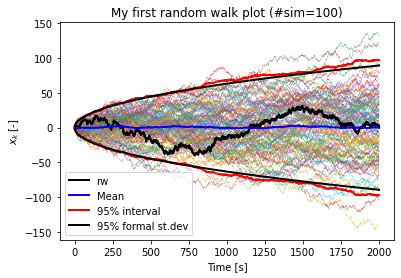

array([[ -0.2990414 ,   0.20381744,   1.65423116, ...,  -0.55163615,
          0.93099459,   0.89094643],
       [ -1.06790669,   0.41252611,   1.98248145, ...,  -1.51928439,
          0.5740521 ,   1.96213663],
       [ -0.62142869,  -0.16387966,   1.50367361, ...,  -1.47673979,
          2.32440771,   1.17734035],
       ...,
       [  3.09814441, -44.82049282, -19.06094069, ..., -38.13785981,
         26.15620064, -21.70483301],
       [  3.10340193, -44.04742062, -18.51189726, ..., -38.00940156,
         25.90811626, -24.35941512],
       [  0.58516978, -43.66841949, -20.18987183, ..., -37.76866147,
         26.64936175, -23.74074411]])

In [73]:
x, sx = randrw(2000, 100, q=1, dt=1, initZero=False)
rw_plot(x, sx)
x

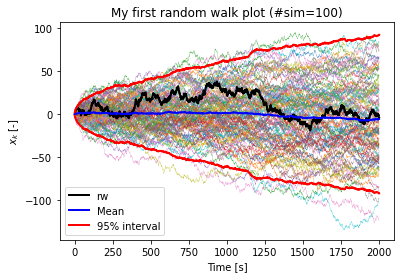

In [4]:
rw_plot(x)

### Question 1.b

> Take your code from question I.a, and modify it to repeat the simulation 20 times. This time you will only plot the empirical mean, empirical standard deviation and formal standard deviation of each simulation (so the plot contains 20 means and standard deviations). Include in your notebook 
> - the resulting plot, and, 
> - your conclusions on the empirical mean, empirical standard deviations and formal standard deviation.

In [15]:
# this code block will have the functions
# function to run simulation num_sim times:
def rw_plot_modified_qn1b(aggregated_simulations):   
    
    x_agg,sx_agg , xmean_agg, xstd_agg= [],[],[],[]
    for x_sx_tuple in aggregated_simulations:
        x_agg.append(x_sx_tuple[0])
        sx_agg.append(x_sx_tuple[1])
        xmean_agg.append( np.mean(x_sx_tuple[0], axis=1))
        xstd_agg.append( np.std(x_sx_tuple[0], axis=1))

    num_sim = len(aggregated_simulations)
    # Compute emeperical mean and standard deviation
    

    # plot it

    plt.figure()

    plt.plot(  xmean_agg[0], color='b', linewidth=2, label='Empirical mean')
    plt.plot( 2*xstd_agg[0], color='r', linewidth=2, label='Empirical std. dev.')
    plt.plot(-2*xstd_agg[0], color='r', linewidth=2)
    plt.plot(   2*sx_agg[0], color='k', linewidth=2, label='Formal std. dev.')
    plt.plot(  -2*sx_agg[0], color='k', linewidth=2)
    for i in range(1, len(xmean_agg)):
        plt.plot(xmean_agg[i], color='b', linewidth=2)
        plt.plot( 2*xstd_agg[i], color='r', linewidth=2)
        plt.plot(-2*xstd_agg[i], color='r', linewidth=2)
        plt.plot( 2*sx_agg[i], color='k', linewidth=2)
        plt.plot(-2*sx_agg[i], color='k', linewidth=2)
    
    plt.xlabel('Time [s]')
    plt.ylabel('$x_k$ [-]')
    plt.title(f'Empirical mean and std.dev, and Formal Std. dev. for {num_sim} simulations')
    plt.legend()
    plt.show()

def simulation_repeat(num_repeat):
    sim_collector = []
    for i in range(num_repeat):
        sim_collector.append(randrw(2000, 100, q=1, dt=1, initZero=False))
    return sim_collector    

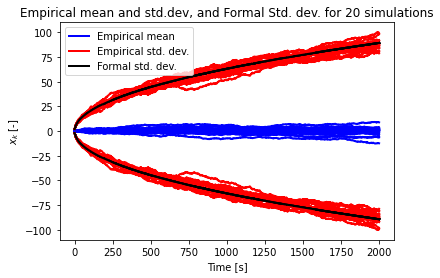

In [16]:
rw_plot_modified_qn1b(simulation_repeat(20))

*Enter here your conclusions using markdown*

### Question I.c

> A sequence is said to be wide-sense stationary when the mean and variance do not change with time. Is the random walk process  x_k wide-sense stationary? 

*Answer* <br>
Looking at the plot generated from question 1.b, we see that the mean almost remains the same as time progresses, however the variance changes along with time (variance woulbe the standard deviation squared), hence the random walk is not wide-sense stationary

## Part II - First order Gauss-Markov process

> A first order Gauss-Markov process is an example of a colored noise process. The first order Gauss-Markov process is a special case of an auto-regressive, or, AR(1) process. The first order Gauss-Markov process is generated using the following recursive formula
>
> $x_k = e^{-\beta \Delta t} x_{k-1} + w_k \ \ \ \ \ \ \ \ w_k \sim N(0,q_k = \frac{q}{2\beta} (1 - e^{-2 \beta \Delta t} ))$
> 
> with $w_k$ normal distributed Gaussian noise with variance $q_k = \frac{q}{2\beta} (1 - e^{-2 \beta \Delta t})$  and with 𝑞 the power spectral density of the underlying *white noise* process . 
> 
> The series $x_k$ is wide sense stationary and describes an exponentially correlated noise process (colored noise): the standard deviation $\sigma_{x_k}$ of $x_k$ is equal to $\sqrt{q/2\beta}$  (verify this yourself) and the correlation period is $T=1/\beta$.  
> 
> The standard deviation for the initial condition $x_0$ is $\sqrt{q/2\beta}$, the same as the standard deviation for any $x_k$, which makes sense because the process is wide sense stationary. 
> 
> Usually we do *not* select values for $q$ and $\beta$, but compute these values from a *chosen* value for the standard deviation $\sigma_{x_k} = \sigma_x$ (constant in time)  and the *chosen* correlation length $T$ for the time series $x_k$, and then  compute $q$ and $\beta$ using the equations $\beta = \frac{1}{T}$ and $q = 2 \beta \sigma_x^2$.  

### Question II.a

> Generate a first order Gauss-Markov sequence with sample interval $\Delta t = 1$ (s), a length of $N=2000$, correlation period $T=100$ (s), and standard deviation $\sigma_x = 1$. Repeat this 30 times and plot all 30 realizations in a single plot. The plot should contain 
> - The 30 realizations of the Gauss-Markov sequence $x_k$  
> - The *formal* standard deviation $\sigma_{x_k}$ as function of time, computed using error propagation on the recursive formula
> - The *empirical* mean and standard deviation of $x_k$ as function of time (using the functions mean and std) 
>
> Hint: for visual appearance, plot instead of the formal and empirical standard deviations, the boundaries of the 95\% reliability interval $-2 \sigma_{x_k}$ and $+2 \sigma_{x_k}$.

In [122]:
# enter here your code and run the cell to produce the result
#
# Though you can implement everything with loops, again, you should definitely consider the use of functions, 
# so that you can re-use some of the code later. If you use functions, please put them in their own cell. 
# Spend some time to think what should be in the function(s), and what not.

def gauss_markov_q2a(n=2000, m=30 ,T=100, dt=1, Sigma=1 , initZero = False):

    Beta = 1/T
    q = (2*Beta* np.power(Sigma,2))
    qk = (q/(2*Beta))*(1 - (np.exp( -2*Beta*dt )))
    std_x =  np.sqrt(q/(2*Beta))
    
    # init variables, x, qx and w
    x  = np.zeros([n,m])
    qx = np.zeros([n,1])
    w = randn(n, m) * np.sqrt(qk)

    if not initZero: #if True, we begin all with 0
        x[0,:] =  w[0,:]
        qx[0] = qk
    
    for k in np.arange(1,n):
        x[k,:] = x[k-1,:]*np.exp((-1)*Beta*dt) + w[k,:]
        qx[k] = qx[k-1]*np.exp((-1)*Beta*dt) + qk

    return x, np.sqrt(qx)


def q2a_plot(x,sx=None, displayAllRealisations=True):   
    n, m = x.shape
    
    # Compute emeperical mean and standard deviation
    
    xmean = np.mean(x, axis=1)
    xstd = np.std(x, axis=1)

    # plot it

    plt.figure()
    # plt.plot(x[:,0], label='rw', linewidth=2, color='k')
    if displayAllRealisations:
        plt.plot(x[:,:], linewidth=0.25)
    plt.plot(xmean,   color='b', linewidth=2, label='Mean')
    plt.plot(2*xstd,  color='r', linewidth=2, label='95% empirical std. dev.')
    plt.plot(-2*xstd, color='r', linewidth=2)
    if sx is not None :
        plt.plot(2*sx, color='k', linewidth=2, label='95% formal std. dev.')
        plt.plot(-2*sx, color='k', linewidth=2)
    plt.xlabel('Time [s]' )
    plt.ylabel('$x_k$ [-]')
    plt.title(f'Gauss-Markov process plot (#sim={m}), n={n}')
    plt.legend()
    plt.show()



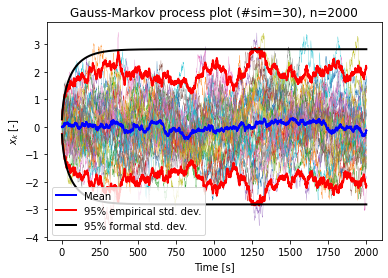

In [123]:
x,std_x = gauss_markov_q2a()
q2a_plot(x,std_x)

### Question II.b

> The *formal* standard deviation $\sigma_{x_k}$, that you computed using error propagation on the recursive formula, should be constant, which is what we expect for a process that is wide-sense stationary. Actually it was one of our input parameters $\sigma_x = 1$, so it should be. The question is, is the process you simulated actually wide-sense stationary? 
To verify you are asked to
> - If you haven’t done so already, compute the formal variance $\sigma_{x_k}$ using error propagation on the recursion formula (as you did with the random-walk process). You should again get a constant, but do you?
> - Increase the number of realisations to obtain a more precise estimate of the *empirical* standard deviation. Does it converge to the *formal* standard deviation $\sigma_{x_k}$ computed from the recursion formula?
>
> When there are deviations these probably occur at the start of the simulation, and are related to the way you initialized the initial values $x_0$. Please explain how you initialized the sequence and what this means for the wide-sense stationarity of the process.  

In [124]:
# compute formal variance using recursion formula, if you have already done this, simply leave this cell as is

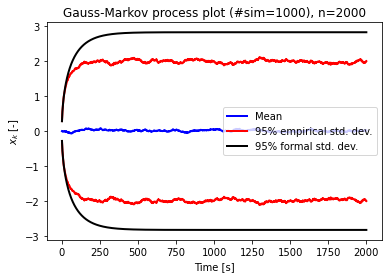

In [129]:
# run the code again using more realisations (here it comes in handy if you have the basic functionality in functions)
x,std_x = gauss_markov_q2a(n=2000, m=1000 ,T=100, dt=1, Sigma=1 , initZero = False)
q2a_plot(x,std_x, displayAllRealisations=False)

*Please explain how you initialized the sequence and what this means for the wide-sense stationarity, using markdown*

To check id the process is wide sense stationary, we need to check if the mean and variance are not changing with time. 
To do so, the number of realisations for the model was increased from 30 in Qn2.a to 500 in Qn2.b, we see that while in both the cases, the formal standard deviation converges to reach an asymptotic value of `e/2`, in case of the 500 realisations model, we see that the empirical standard deviation also behaves almost constant, though it fails to converge with the formal standard deviation. The rest of the parameters were set in the same way as Qn2.a


### Question II.c 

> Rewrite the code of II.a and II.b into one or more functions (if you haven’t done so already). The core function should return the empirical mean and standard deviation, formal standard deviation and a matrix with the realisations. The function(s) should have well defined inputs and outputs, and include a description on how to use each  function (preferably using Python documentation style).  Use the functions to generate the output of II.a and II.b. Of course, you may use the functions also for II.a and II.b, but we have listed this here as a separate item to emphasize that in II.c  you receive a grade depending on how well the coding is done.

In [133]:
# Place holder for any new code, simply leave this cell as is if you have defined the functions in II.a and II.b
def gauss_markov_q2c(n=2000, m=30 ,T=100, dt=1, Sigma=1 , initZero = False):
    """
    Function Params:
    n (int)        : The length of the simulation
    m (int)        : Number of realisations for which the simulation is to be run
    T (int)        : Correlation period
    dt (int)       : Sample interval
    Sigma (int)    : Standard deviation
    initZero (boolean) : If False, sets the initial values of variables x and qx as non-Zero, zero otherwise
    _____________________
    Returns:
    (tuple) containing:
    empirical_mean (numpy array): array containing the empirical mean as function of time
    empirical_std (numpy array) : array containing the empirical standard deviation as function of time
    formal_std (numpy array)    : array containing the formal standard deviation as function of time
    x (numpy matrix)            : matrix containing the values for the realisations
    """
    # deriving beta and q from provided parameter values
    Beta = 1/T
    q = (2*Beta* np.power(Sigma,2))
    qk = (q/(2*Beta))*(1 - (np.exp( -2*Beta*dt )))
    
    # init variables, x, qx and w
    x  = np.zeros([n,m])
    qx = np.zeros([n,1])
    w = randn(n, m) * np.sqrt(qk)

    # set value of first element in x and qx, depending on parameter value
    if not initZero: #if True, we begin all with 0
        x[0,:] =  w[0,:]
        qx[0] = qk
    
    # loop through the length set in parameter and compute values for x and qx
    for k in np.arange(1,n):
        x[k,:] = x[k-1,:]*np.exp((-1)*Beta*dt) + w[k,:]
        qx[k] = qx[k-1]*np.exp((-1)*Beta*dt) + qk
    
    # compute empirical mean and std dev, as well as formal std dev
    empirical_mean= np.mean(x, axis=1)
    empirical_std = np.std(x, axis=1)
    formal_std = np.sqrt(qx)

    return (empirical_mean, empirical_std, formal_std, x)

gauss_markov_q2c()[-2]

array([[0.14071719],
       [0.19850851],
       [0.24251775],
       ...,
       [1.41069126],
       [1.41069126],
       [1.41069126]])

### Question II.d

> Create a new plot with seven samples of a Gauss-Markov series (one realization only for each), each  using different values for $T$, with $T=1$, $T=10$, $T=50$, $T=100$, $T=500$, $T=1000$ and $T=5000$ (s), using the function of II.c (but the actual plotting does not have to be a function). For clarity, offset(shift) each realization in the vertical direction, so that the individual series do not overlap, or use subplots. There are different ways to organize the plots, but the idea is that you produce a plot that effectively shows the effect of using different values for $T$.

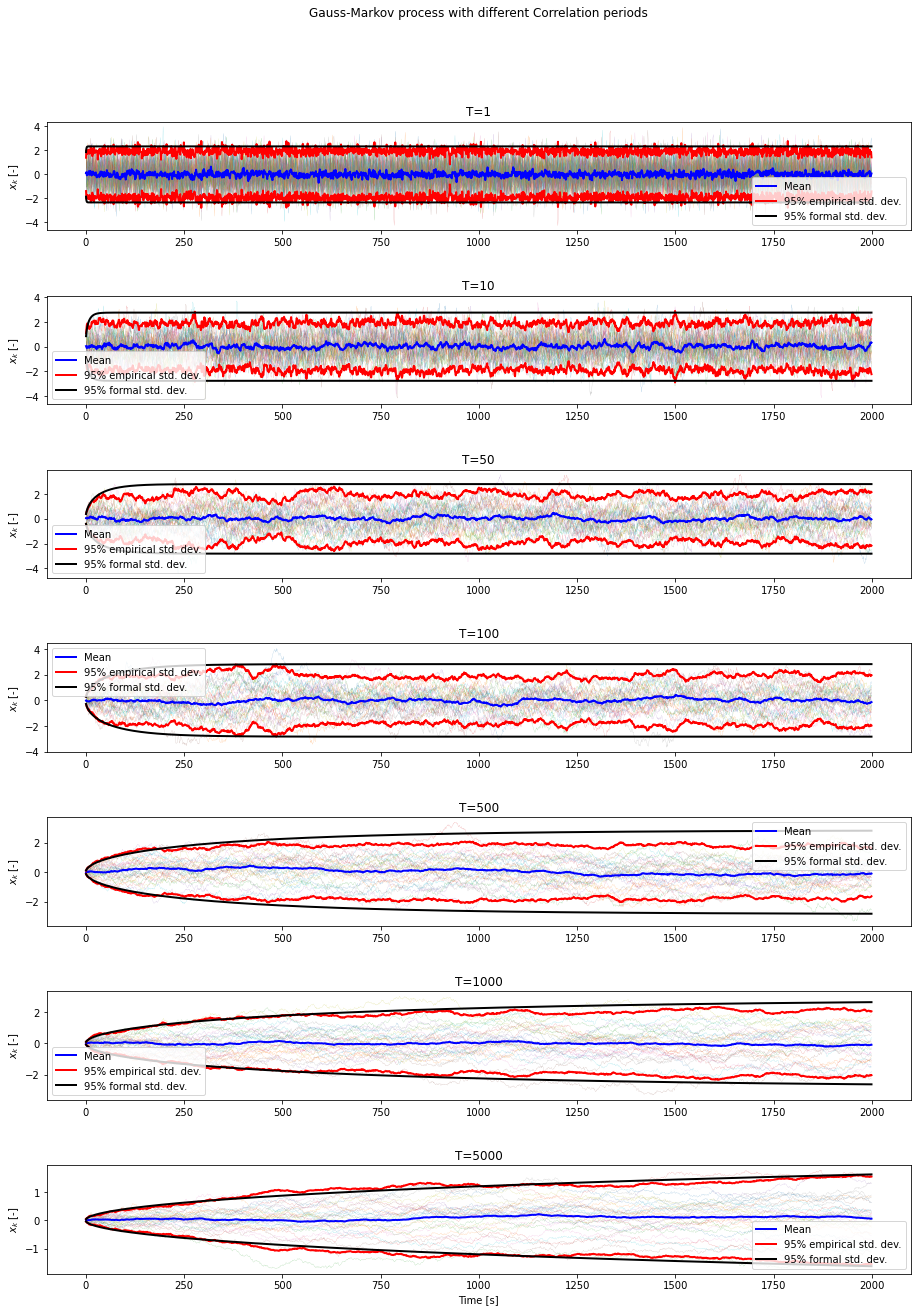

In [162]:
# function for plotting on subplot axes
def subplotter_qn2d(q2c_output, ax=None, title='Subplot'):
    """
    Parameters:
    q2c_output (tuple): tuple containing the empirical mean, std.dev., formal std.dev. and realisation matrix
    ax (matplotlib get current axis instance): 
    ____________
    Returns:

    """
    # initialize axis if not passed (which should never be the case)
    if ax is None:
        ax = plt.gca()
    
    # extract values from the tuple from first parameter
    # Compute emeperical mean and standard deviation
    xmean, xstd, sx, x = q2c_output
    n, m = x.shape

    xmean = np.mean(x, axis=1)
    xstd = np.std(x, axis=1)
    # plot it
    ax.plot(x[:,:], linewidth=0.1)
    ax.plot(xmean,   color='b', linewidth=2, label='Mean')
    ax.plot(2*xstd,  color='r', linewidth=2, label='95% empirical std. dev.')
    ax.plot(-2*xstd, color='r', linewidth=2)
    ax.plot( 2*sx, color='k', linewidth=2, label='95% formal std. dev.')
    ax.plot(-2*sx, color='k', linewidth=2)
    ax.set_title(title)
    ax.legend()
    return ax


t1    = gauss_markov_q2c(n=2000, m=30 ,T=1,    dt=1, Sigma=1 , initZero = False)
t10   = gauss_markov_q2c(n=2000, m=30 ,T=10,   dt=1, Sigma=1 , initZero = False)
t50   = gauss_markov_q2c(n=2000, m=30 ,T=50,   dt=1, Sigma=1 , initZero = False)
t100  = gauss_markov_q2c(n=2000, m=30 ,T=100,  dt=1, Sigma=1 , initZero = False)
t500  = gauss_markov_q2c(n=2000, m=30 ,T=500,  dt=1, Sigma=1 , initZero = False)
t1000 = gauss_markov_q2c(n=2000, m=30 ,T=1000, dt=1, Sigma=1 , initZero = False)
t5000 = gauss_markov_q2c(n=2000, m=30 ,T=5000, dt=1, Sigma=1 , initZero = False)



fig, (axs) = plt.subplots(7, figsize= (15,20), sharex=False)
ax1, ax2, ax3, ax4, ax5, ax6, ax7 = axs
fig.suptitle('Gauss-Markov process with different Correlation periods')
subplotter_qn2d(t1,   ax1, 'T=1')
subplotter_qn2d(t10,  ax2, 'T=10')
subplotter_qn2d(t50,  ax3, 'T=50')
subplotter_qn2d(t100, ax4, 'T=100')
subplotter_qn2d(t500, ax5, 'T=500')
subplotter_qn2d(t1000,ax6, 'T=1000')
subplotter_qn2d(t5000,ax7, 'T=5000')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.xlabel('Time [s]' )
# plt.ylabel('$x_k$ [-]')
plt.setp(axs[:], ylabel='$x_k$ [-]')
plt.show()

## Part III - Standard deviation of the slope (rate of change)

> In this part you will fit a line to each realization and compute the offset and slope.  The expected true values for the offset and slope are both zero, but of course, the estimated empirical values are not equal to zero. 
> 
> You are asked to make a table with the mean and standard deviation of the estimated slope parameter for each of the seven cases of question II.d. To be able to compute the standard deviation of the slope you have to use multiple realizations, unlike question II.d, which plots only a single realization, estimate the slope for each realization, and then compute the mean and standard deviation. Repeat this for every case of II.d .
> 
> What do you conclude from this simulation? For comparison you may also include white noise and random walk processes in this simulation. Please mention your conclusion in your report or notebook.

In [ ]:
# Enter your code here, and run it, to show the table with the mean and standard deviation of the estimated slope for each case

*Your conclusions from this simulation in markdown. For comparison you may also include white noise and random walk processes.*

[End of this Jupyter notebook]